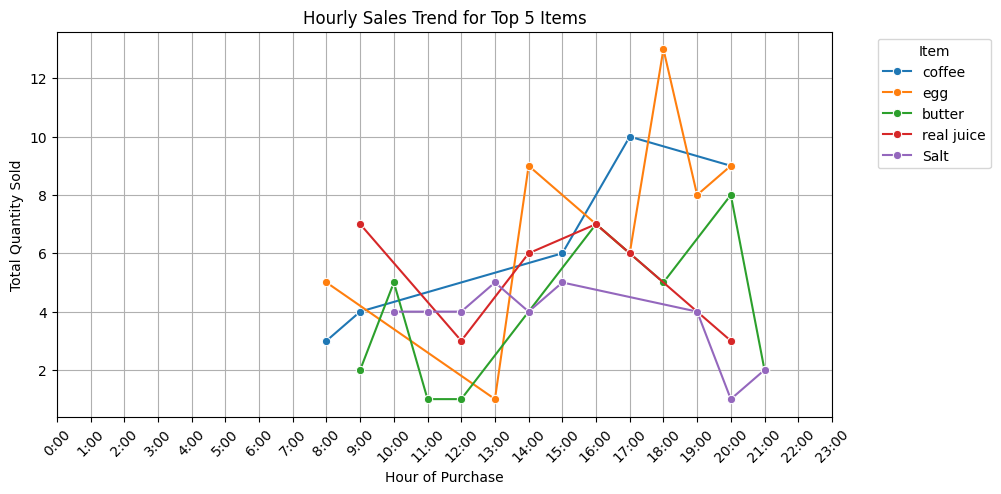

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/DMA.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1", dtype={"Time_of_Purchase": str})

df["Time_of_Purchase"] = pd.to_datetime(df["Time_of_Purchase"], format="%H:%M:%S", errors="coerce").dt.time

structured_data = []
for _, row in df.iterrows():
    items = [i.strip() for i in str(row["Purchased_Items"]).split(",")]
    quantities = [q.strip() for q in str(row["Quantities"]).split(",") if q.strip().isdigit()]

    if len(items) == len(quantities):
        for item, quantity in zip(items, map(int, quantities)):
            structured_data.append([item, quantity, row["Time_of_Purchase"]])

item_time_df = pd.DataFrame(structured_data, columns=["Item", "Quantity", "Time_of_Purchase"])

item_time_df["Hour"] = pd.to_datetime(item_time_df["Time_of_Purchase"], format="%H:%M:%S", errors="coerce").dt.hour

hourly_analysis = item_time_df.groupby(["Hour", "Item"])['Quantity'].sum().reset_index()

top_items = hourly_analysis.groupby("Item")["Quantity"].sum().nlargest(5).index
filtered_data = hourly_analysis[hourly_analysis["Item"].isin(top_items)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_data, x="Hour", y="Quantity", hue="Item", marker="o")
plt.xticks(range(0, 24), [f"{h}:00" for h in range(0, 24)], rotation=45)
plt.xlabel("Hour of Purchase")
plt.ylabel("Total Quantity Sold")
plt.title("Hourly Sales Trend for Top 5 Items")
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


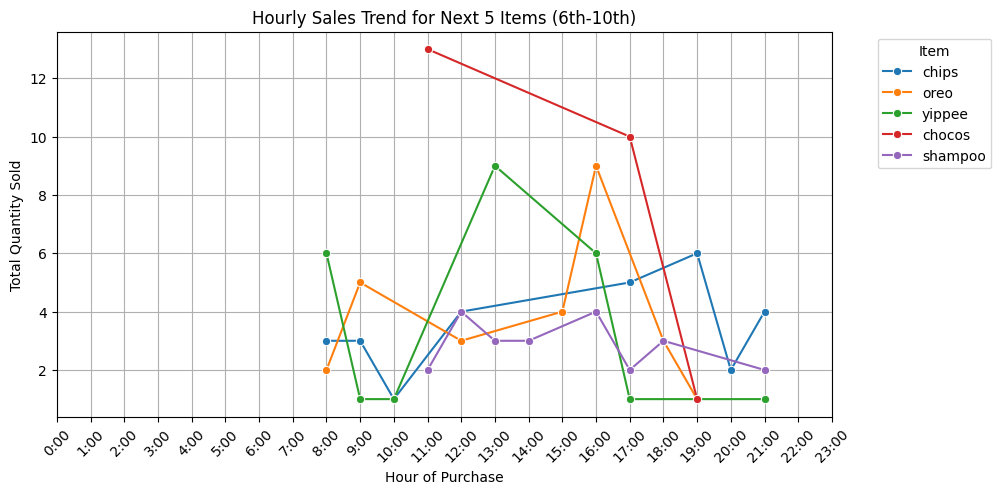

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "/content/DMA.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1", dtype={"Time_of_Purchase": str})

# Convert Time_of_Purchase to proper time format
df["Time_of_Purchase"] = pd.to_datetime(df["Time_of_Purchase"], format="%H:%M:%S", errors="coerce").dt.time

# Extract and structure item-time-quantity data
structured_data = []
for _, row in df.iterrows():
    items = [i.strip() for i in str(row["Purchased_Items"]).split(",")]
    quantities = [q.strip() for q in str(row["Quantities"]).split(",") if q.strip().isdigit()]

    if len(items) == len(quantities):
        for item, quantity in zip(items, map(int, quantities)):
            structured_data.append([item, quantity, row["Time_of_Purchase"]])

# Creating DataFrame
item_time_df = pd.DataFrame(structured_data, columns=["Item", "Quantity", "Time_of_Purchase"])

# Convert Time_of_Purchase to hour only (e.g., 1, 2, 3 for 1 AM, 2 AM, etc.)
item_time_df["Hour"] = pd.to_datetime(item_time_df["Time_of_Purchase"], format="%H:%M:%S", errors="coerce").dt.hour

# Aggregate data by hour and item
hourly_analysis = item_time_df.groupby(["Hour", "Item"])['Quantity'].sum().reset_index()

# Select the next top 5 selling items (6th to 10th)
top_items = hourly_analysis.groupby("Item")["Quantity"].sum().nlargest(10).index[5:]
filtered_data = hourly_analysis[hourly_analysis["Item"].isin(top_items)]

# Plot the graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_data, x="Hour", y="Quantity", hue="Item", marker="o")
plt.xticks(range(0, 24), [f"{h}:00" for h in range(0, 24)], rotation=45)
plt.xlabel("Hour of Purchase")
plt.ylabel("Total Quantity Sold")
plt.title("Hourly Sales Trend for Next 5 Items (6th-10th)")
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()
